In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tl = pd.read_csv("Students Exam Scores.csv")
tl.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
tl.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
tl.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop Unnamed Column

In [6]:
ta = tl.drop("Unnamed: 0", axis = 1)
ta.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Gender Distribution

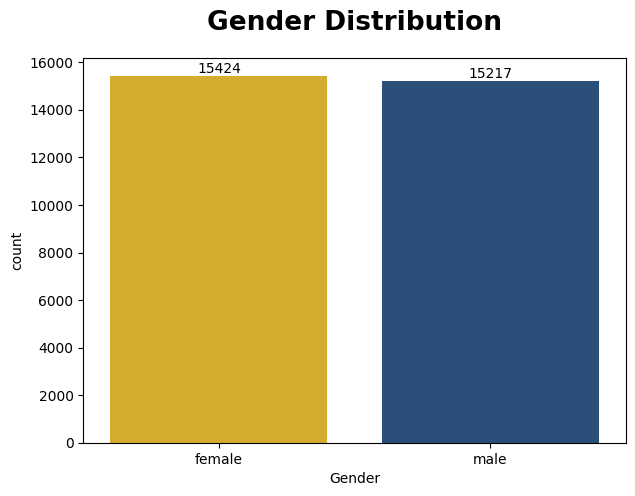

In [22]:
plt.figure(figsize=(7,5))
count = sns.countplot(data = ta, x = "Gender", hue = "Gender", palette={'male':'#1d4f85', 'female':'#f0bc13'})
count.bar_label(count.containers[0])
count.bar_label(count.containers[1])
plt.title("Gender Distribution", fontsize=19, fontweight='bold', pad=20)
plt.savefig("Gender Distribution.jpg")
plt.show()

### From the above chart we have analysed that:

Number of 'Females' in the data is more than the number of 'Males'.

Female = 15424 & Male = 15217

## Analysis on the Basis on Parent Education

In [8]:
group_By = ta.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
group_By

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


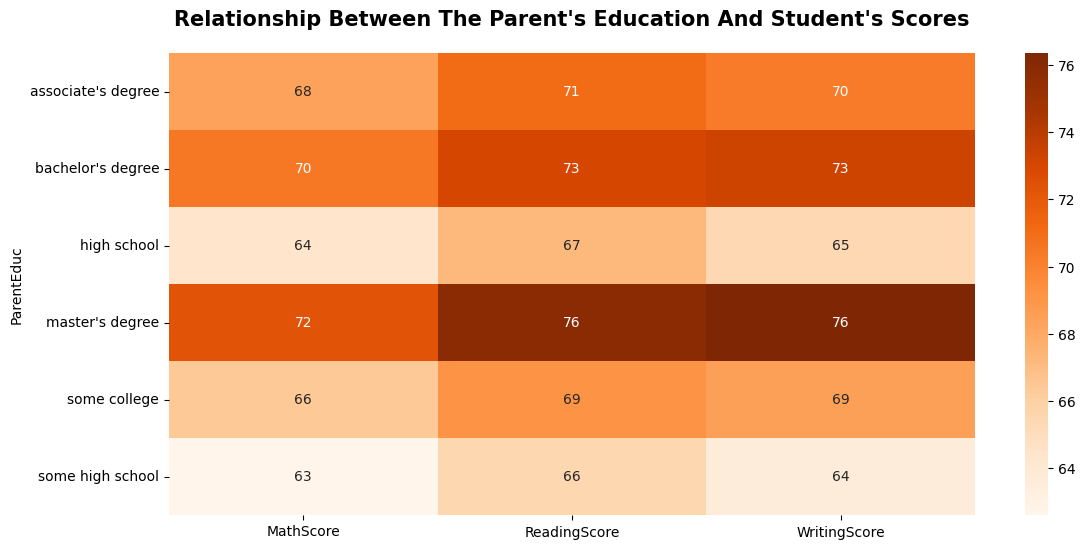

In [30]:
plt.figure(figsize=(13,6))
sns.heatmap(group_By, annot = True, cmap='Oranges')
plt.title("Relationship Between The Parent's Education And Student's Scores", fontsize=15, fontweight='bold', pad=20, color='black')
plt.savefig("Relationship Between The Parent's Education And Student's Scores.jpg")
plt.show()

Result: 
From the above chart we have concluded that the Parent's Education have a good impact on their scores

## Analysis on the Basis on Parent Material Status

In [10]:
group_By_1 = ta.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
group_By_1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


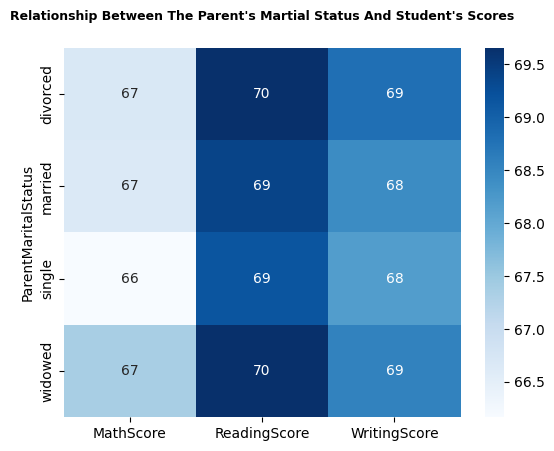

In [34]:
sns.heatmap(group_By_1, annot = True, cmap='Blues')
plt.title("Relationship Between The Parent's Martial Status And Student's Scores", fontsize=9, fontweight='bold', pad=20)
plt.savefig("Relationship Between The Parent's Martial Status And Student's Scores.jpg")
plt.show()



Result: From the above chart we have concluded that there is no impact on the 
student's scorse due to their parent's material status.

## Analysis on the Basis on Study(Number OF Hours)

In [12]:
group_By_2 = ta.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
group_By_2

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


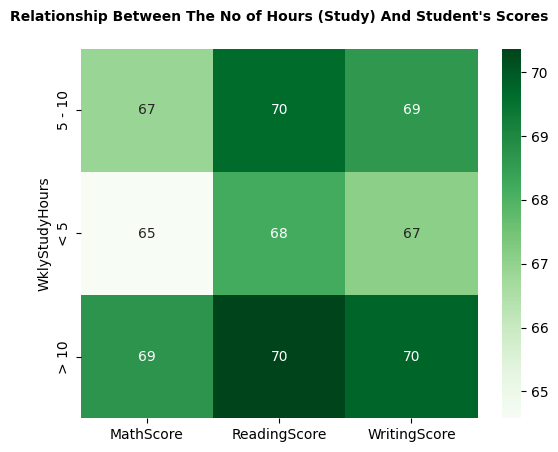

In [36]:
#plt.figure(figsize=(6,4))
sns.heatmap(group_By_2, annot=True, cmap='Greens')
plt.title("Relationship Between The No of Hours (Study) And Student's Scores", fontsize=10, fontweight='bold', pad=20)
plt.savefig("Relationship Between The No of Hours (Study) And Student's Scores.jpg")
plt.show()

Result: From the above chart we have concluded that there is no impact on the 
student's scorse due to the no of hours of study.

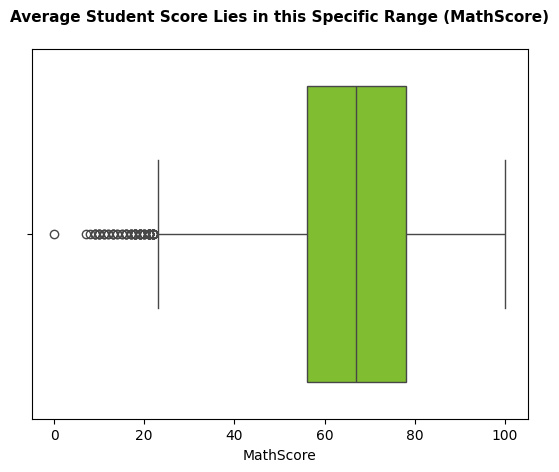

In [38]:
sns.boxplot(data = ta, x = "MathScore", color="#83d419")
plt.title("Average Student Score Lies in this Specific Range (MathScore)", fontsize=11, fontweight='bold', pad=20)
plt.savefig("Average Student Score Lies in this Specific Range (MathScore).jpg")
plt.show()

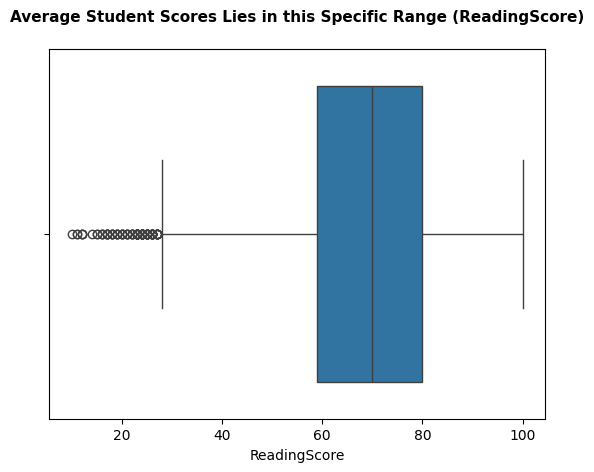

In [39]:
sns.boxplot(data = ta, x = "ReadingScore")
plt.title("Average Student Scores Lies in this Specific Range (ReadingScore)", fontsize=11, fontweight='bold', pad=20)
plt.savefig("Average Student Score Lies in this Specific Range (ReadingScore).jpg")
plt.show()

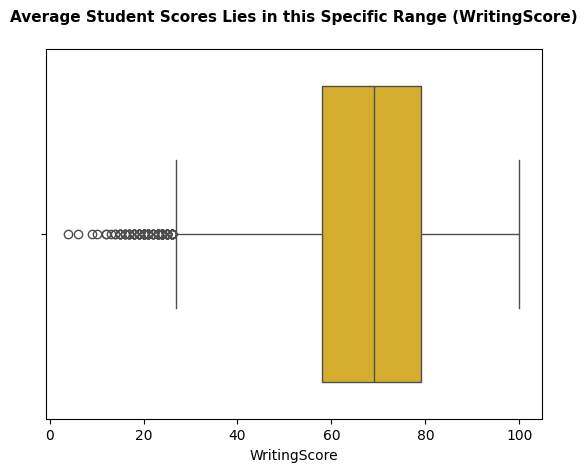

In [40]:
sns.boxplot(data = ta, x = "WritingScore", color="#f0bc13")
plt.title("Average Student Scores Lies in this Specific Range (WritingScore)", fontsize=11, fontweight='bold', pad=20)
plt.savefig("Average Student Score Lies in this Specific Range (WritingScore).jpg")
plt.show()

Note: Circle type shaped are outlayers

Student are compartively weak in Math instead of Reading and Writing

In [17]:
print(ta["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Group

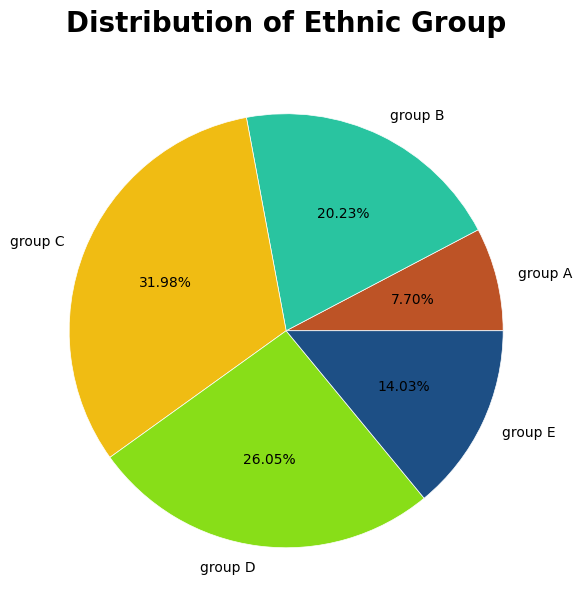

In [18]:
plt.figure(figsize=(7,9))
Group_A = ta.loc[(ta['EthnicGroup']== "group A")].count()
Group_B = ta.loc[(ta['EthnicGroup']== "group B")].count()
Group_C = ta.loc[(ta['EthnicGroup']== "group C")].count()
Group_D = ta.loc[(ta['EthnicGroup']== "group D")].count()
Group_E = ta.loc[(ta['EthnicGroup']== "group E")].count()

lbs = ["group A","group B","group C","group D","group E"]
my_List = [Group_A["EthnicGroup"],Group_B["EthnicGroup"],Group_C["EthnicGroup"],Group_D["EthnicGroup"],Group_E["EthnicGroup"]]
color = ['#bd5326', '#29c4a0', '#f0bc13', '#88de18', '#1d4f85']
plt.pie(my_List , labels = lbs, autopct = "%1.2f%%", colors = color,  wedgeprops={'linewidth': .5, 'edgecolor': 'white'})
plt.title("Distribution of Ethnic Group", fontsize=20, fontweight='bold', pad=20)
label_colors = ['black', 'darkblue', 'darkgreen', 'darkred', 'purple']
plt.savefig("Average Student Score Lies in this Specific Range (WritingScore).jpg")
plt.show()

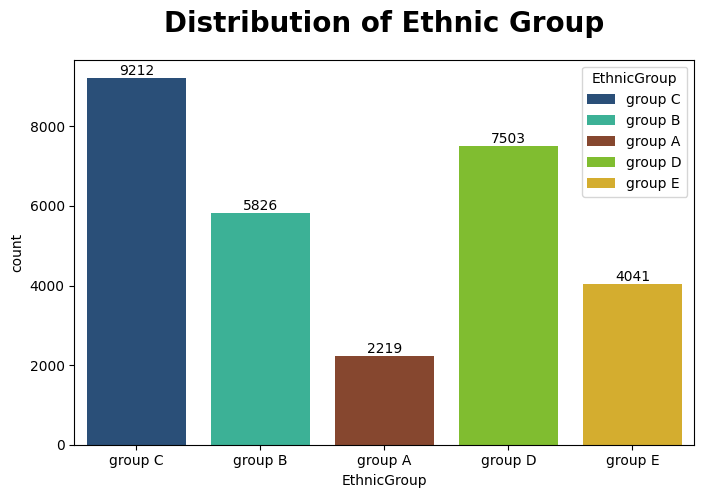

In [19]:
plt.figure(figsize=(8,5))
count = sns.countplot(data = ta, x = "EthnicGroup" , hue = "EthnicGroup", palette={'group A':'#944121','group B':'#29c4a0','group C':'#1d4f85','group D':'#83d419', 'group E':'#f0bc13'})
count.bar_label(count.containers[0])
count.bar_label(count.containers[1])
count.bar_label(count.containers[2])
count.bar_label(count.containers[3])
count.bar_label(count.containers[4])
plt.title("Distribution of Ethnic Group", fontsize=20, fontweight='bold', pad=20)
plt.show()